# Receipts OCR detection and XML processing
    
<strong>*OCR Receipts Text Detection Dataset*</strong>
    



<p style="text-align:right">V&iacute;ctor Viloria  (<em>ComputingVictor</em>)</p>



<hr style="border:1px solid gray">

# Structure

[Introduction](#introduction) 

[1. Python libraries](#libraries) 

[2. Data Loading](#data) 

[3. OCR detection ](#OCR) 

   - 3.1 Example of well performance in text detection
   - 3.2 Example of bad performance in text detection
   - 3.3 Preprocessing of pictures 
   
[4. Keras OCR detection](#keras) 
   
[5. XML Processing](#xml) 

[6. Conclusions](#conclusions) 

<hr style="border:1px solid gray">

# Introduction 

In this notebook, we will proceed to open the different images, apply text detection using two different libraries "pytesseract" and "keras_ocr". Then we will convert the XML to a DF that could be used for other kind of projects.

# 1. Python libraries

In [1]:
# Basic libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import re

# OCR libraries.
import pytesseract
from pytesseract import Output
!pip install keras_ocr
import keras_ocr
from keras_ocr.detection import Detector
from keras_ocr.recognition import Recognizer
from keras_ocr import pipeline

# XML reader.
import xml.etree.ElementTree as ET


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.9 MB/s eta 0:00:00


# 2. Data Loading

We display all the images in the path.

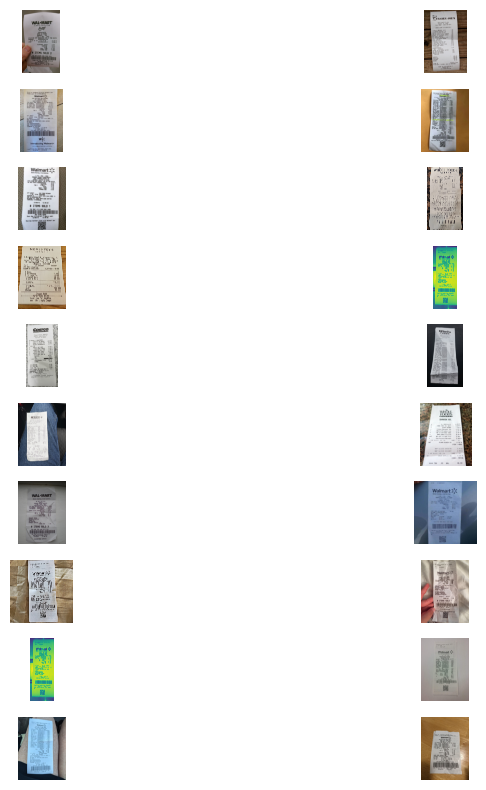

In [2]:

# Load the CSV with the images names.
df = pd.read_csv('/kaggle/input/ocr-receipts-text-detection/receipts.csv')  # Reemplaza 'tu_archivo.csv' con la ubicación de tu archivo CSV

# Input the number of columns for the display.
num_cols = 2

# Calculation of the total images and rows 
num_images = len(df)
num_rows = int(np.ceil(num_images / num_cols))

# Plot the pictures
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, row in df.iterrows():
    row_idx = i // num_cols
    col_idx = i % num_cols
    image_path = "/kaggle/input/ocr-receipts-text-detection/" + str(row['image_name'])  # Obtener la ruta de la imagen desde la columna 'image_name'
    img = mpimg.imread(image_path)
    axes[row_idx, col_idx].imshow(img)
    axes[row_idx, col_idx].axis('off')

# Display the pictures.
plt.tight_layout()
plt.show()

# 3. OCR Detection

### 3.1. Example of well performance in text detection:

During the different tries, there are many files that are well detected, by the way, due to the different structures of the tickets, it's hard to export the data to a DF. For that readon in the point 4 we will use the `annotations.xml` file for that.

 

   
  
  
  
  

Give us feedback @ survey.walmart .com
Thank you! ID #:7PBGSJWCFZ2

Walmart >\<

949-498-6669 Mor : wae
951 _AVENIDA PICO

SAN CLEMENTE CA 92673
ST# 02527 OP# 009045 TE# 45 TR¥ 06193
GV OATMEAL 007874243408 F = -1.76 0
OT 2002 TUM 081236803115 6.74 X
M ATHLETICS 019104567781 24.97 X
DEXAS 15X20 008429710921 12.97 X

SUBTOTAL 46.44
TAX 1 7.750 % 3.46

TOTAL
DEBIT TEND 49.90
CHANGE DUE 0.00
DEBIT PAY FROM PRIMARY
49.90 TOTAL PURCHASE
Us DEBIT axxx naxx trex 9689 I 0
REF # 029200639128

NETWORK ID. 0056 APPR CODE 461500
US DEBIT

1004
ae 11:30:42

wii iid

+
Ritroduciny Walmart+
Join today at walmarL.cony/plus

 

 

 

 

 

‘ices You Trust. Every Day.
bow Pe era” Tt:80:46

 

 

 

 



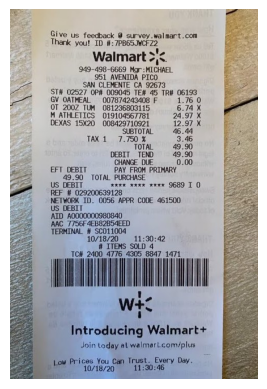

In [3]:
# Load the image.
img = mpimg.imread('/kaggle/input/ocr-receipts-text-detection/images/2.jpg')

# OCR detecion.
text = pytesseract.image_to_string(img,lang='eng')
print(text)

# Display the picture.
plt.imshow(img)
plt.axis('off') 
plt.show()

MOMI & TOY’S

CREPERIE

Tepe Mall Kemang, L.
emang VI No. 6
momiantoys_ind Cinst
@indmomi Ctwitter)
Check: 3850

Pax: OP: Gunawan Gunawan
POS Title:Cashier
na 26/01/2018 16:13
1 Woman 0
2 Ham Cheese 74, 000
1 Ice Java Tea 16, 000
1 Mineral Water 13, 000
1 Black & White 72, 000
SUBTOTAL 175, 000
TOTAL 175, 000
CASH 200, 000
Change 25

 

Closed Bil]
ween enn en n= 26/01/2015 16: 14----------->
Thank you for tasting
our “Meltingly Crepe"



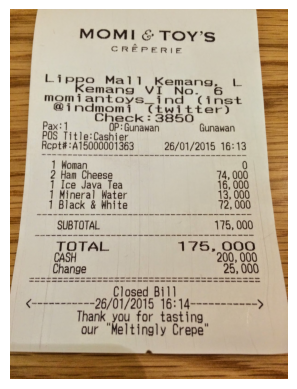

In [4]:
# Load the image.
img = mpimg.imread('/kaggle/input/ocr-receipts-text-detection/images/6.JPG')

# OCR detecion.
text = pytesseract.image_to_string(img,lang='eng')
print(text)

# Display the picture.
plt.imshow(img)
plt.axis('off') 
plt.show()

By the way, for example, we can archive all the tickets that belong to Walmart.

In [5]:
# List that contains the files with text that includes "WAL*MART" o "WALMART".
archivos_con_walmart = []

# OCR for pics 1-5.
for i in range(0, 6): 
    nombre_archivo = f"/kaggle/input/ocr-receipts-text-detection/images/{i}.jpg"
    
    imagen = Image.open(nombre_archivo)
    texto_ocr = pytesseract.image_to_string(imagen).lower()
    
    # Text verification.
    if "wal*mart" in texto_ocr or "walmart" in texto_ocr:
        archivos_con_walmart.append(nombre_archivo)

# OCR for pics 7-19
for i in range(7, 20):  # Suponiendo que tienes imágenes numeradas del 1 al 19
    nombre_archivo = f"/kaggle/input/ocr-receipts-text-detection/images/{i}.jpg"
    
    imagen = Image.open(nombre_archivo)
    texto_ocr = pytesseract.image_to_string(imagen).lower()
    
    # Text verification
    if "wal*mart" in texto_ocr or "walmart" in texto_ocr:
        archivos_con_walmart.append(nombre_archivo)

# Print the tickets of Walmart.
print("Files with WAL*MART or WALMART:")
for archivo in archivos_con_walmart:
    print(archivo)


Files with WAL*MART or WALMART:
/kaggle/input/ocr-receipts-text-detection/images/0.jpg
/kaggle/input/ocr-receipts-text-detection/images/2.jpg
/kaggle/input/ocr-receipts-text-detection/images/3.jpg
/kaggle/input/ocr-receipts-text-detection/images/4.jpg
/kaggle/input/ocr-receipts-text-detection/images/7.jpg
/kaggle/input/ocr-receipts-text-detection/images/12.jpg
/kaggle/input/ocr-receipts-text-detection/images/13.jpg
/kaggle/input/ocr-receipts-text-detection/images/14.jpg
/kaggle/input/ocr-receipts-text-detection/images/15.jpg
/kaggle/input/ocr-receipts-text-detection/images/16.jpg
/kaggle/input/ocr-receipts-text-detection/images/17.jpg
/kaggle/input/ocr-receipts-text-detection/images/18.jpg
/kaggle/input/ocr-receipts-text-detection/images/19.jpg


### 3.2. Example of bad performance in text detection

See back of p,
to win $1000 Th)

{UR NCIRG SO _nor

Bis Br BLON | EA 124
_BTS ORY 10 Hegre

TR HS FRM 4 Sozesotezi98
BAGELS 1013:

GV SLIDERS
ACCESSORY 61:
CHEEZE IT

WAS 4.54 YOU SAV

Se

ns
SS8S28S2 SNeRz

R. Goa 00

RUFFLES 10020942 F

GV HNY GRHS OaTeTaOTzES Fi
SUBTOTAL

TAX 1 7,000 %
an
rte

sia ion

Scan vith Galrart app ee cap receipts
‘sa Ta]

zzz oxxox

ry
Soomauan

i
6
2
2)
4
2
0
4
2:
2)
15
9
4
4
0,
6.

 



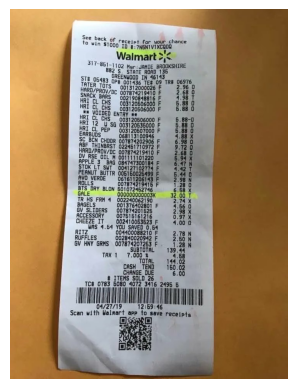

In [6]:
# Load the image.
img = mpimg.imread('/kaggle/input/ocr-receipts-text-detection/images/3.jpg')

# OCR detecion.
text = pytesseract.image_to_string(img,lang='eng')
print(text)

# Display the picture.
plt.imshow(img)
plt.axis('off') 
plt.show()

In this case, the text detection has many issues.

### 3.3. Preprocessing of pictures 

As we saw above, there are pictures that are not easy to detect, we will apply some techniques trying to improve it.

     

fer back 0} chance
to win $1000 "aoe av hed

Waimart ><

S17-B64- yg2 Har JAKE BROGKSHIRE
882s. staTE ROAD

Sit O5483 See ae gears
002

TATE] 2.36 0
HRRD/PROU Soe oinaeieng epee o

CK BARS “ oo2igogaagig F 6 4.98 T
AT GL CHS ogi zogogood F 0B.
HRY gL cas gosizos06000 F 8.88
HRI cL OHS 205120506000 F 8

  
 

RRE 12 ‘Us 0034, Baad 10 F

a
eet
eed

2

ER RNG sos

a
6.68 x
¥2.00
2.74 X
4.56 0
int
4.000
2.78 N
2.80 N
1.28 N
3.44
ide
160.02
6.00

wii til i iia iiany

Scan vith Gainart app Mor oe receipts
i

         
     
   
   
   

 
  
   
 



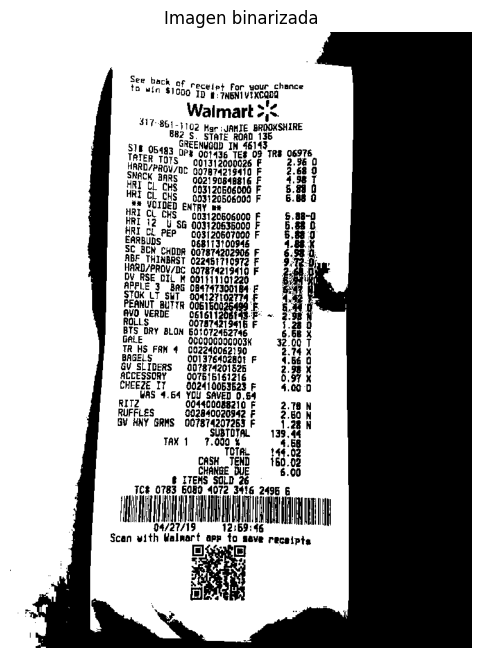

In [7]:
# Load the picture.
image = cv2.imread('/kaggle/input/ocr-receipts-text-detection/images/3.jpg')

# Transform to gray.
imagen_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Highlight the image.
_, imagen_binaria = cv2.threshold(imagen_gris, 128, 255, cv2.THRESH_BINARY)

# Noise removal.
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#imagen_filtrada = cv2.morphologyEx(imagen_binaria, cv2.MORPH_OPEN, kernel)

# Increase contrast.
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#imagen_contrastada = clahe.apply(imagen_filtrada)

# OCR.
texto_ocr = pytesseract.image_to_string(imagen_binaria)
print(texto_ocr)

# Display the picture in gray.

plt.figure(figsize=(8, 8))
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen binarizada')
plt.axis('off')
plt.show()


After the preprocessing we can see, it's har to detect the text right.

# 4. Keras OCR detection

After trying to preprocess, we will try the Keras library to detect the text.

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
8/8 [==============================] - 21s 2s/step


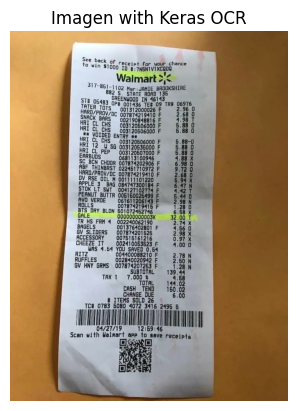

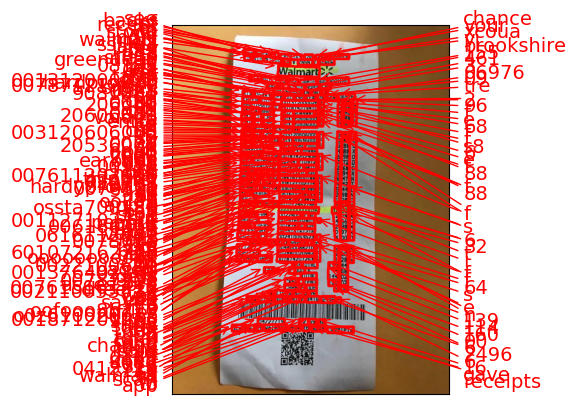

In [8]:
# Load the detecto and recognizer.
detector = Detector()
recognizer = Recognizer()


# Load the pipeline for the OCR.
pipeline = keras_ocr.pipeline.Pipeline()

# Load the picture.
images = [keras_ocr.tools.read('/kaggle/input/ocr-receipts-text-detection/images/3.jpg')]

# Recognize the image.
prediction_groups = pipeline.recognize(images)

# Load the results.
for i in range(len(images)):
    plt.imshow(images[i])
    plt.title('Imagen with Keras OCR')
    plt.axis('off')
    keras_ocr.tools.drawAnnotations(image=images[i], predictions=prediction_groups[i])
    plt.show()


In [9]:
# Join the text
texto_completo = ""

for text, _ in prediction_groups[0]:
    texto_completo += text + " "

# Print the text.
print(texto_completo)

see backs of receet chance for your to win stoco id xcoua vi ingni walmart siz ssllio2 brookshire her jahie 882 s 155 road stiate greenuoad 461 3 in stt 08183 opi 06976 001 09 tre tet 436 tater tots  2 96 001312000026 f hardprovidc e 68 007871219410 f snack bars f s8 0021 9081881 6 hri cl chs e 0031 206go0 hri cl chs f 88 0031 20606000 voided te entry te hri cl chs  003120606000 f 88  hri 12 v sg 0071 20536000  hri cl pep 0031 2060 700o earbuds 068 151 00916 sc bcn chddr 007611202906 f abe thinbrst 022161 710712 hardyprovide 007e121 9910 dv rse oil 220 m oollo1 apple 9 bag ossta700181  stok lt sut 001127102771 peanut butir 006160026 499 s avo verde 0616112061 3 rolls 0078721 916 bts dry blon 601072162716  6 gale ooooooooook 32 t tr hs frn 0022100621 90 i  bagels 001376402801 f gv iders sl 00787201 828 accessory 007615161216 cheerze t 002110055523 f was 84 you saved 64 s o ritz oofooo8b210 s e  n ruffles o0z610020612 gv hny grms 001871201266 subd total 139 tax 7 000 i 114 total cash ten

New OCR doesn't seems too good as the other receipts.

# 5. XML Processing

After performing the text detection and seeing that the ticket formats were different even in the same store, we proceeded to use the XML to create a dataframe that can be used for analysis.

In [10]:
# Load the XML file.
with open("/kaggle/input/ocr-receipts-text-detection/annotations.xml", "r", encoding="utf-8") as file:
    xml_string = file.read()

# Function to extarct the XML data.
def extract_data(element, image_id):
    data = {
        'image_id': image_id,  
        'label': element.get('label'),
        'source': element.get('source'),
        'occluded': element.get('occluded'),
        'z_order': element.get('z_order')
    }
    
    if element.tag == 'box':
        data.update({
            'xtl': element.get('xtl'),
            'ytl': element.get('ytl'),
            'xbr': element.get('xbr'),
            'ybr': element.get('ybr'),
            'rotation': element.get('rotation'),
            'attribute_name': element.find('attribute').get('name'),
            'attribute_text': element.find('attribute').text
        })
    elif element.tag == 'polygon':
        data.update({
            'points': element.get('points')
        })

    return data

# Create the DF
data = []
tree = ET.fromstring(xml_string)  
for image in tree.findall('.//image'):
    image_id = image.get('id')
    for sub_element in image:
        data.append(extract_data(sub_element, image_id))

df = pd.DataFrame(data)

# Display the DF.
df

,image_id,label,source,occluded,z_order,points,xtl,ytl,xbr,ybr,rotation,attribute_name,attribute_text
0,0,receipt,manual,0,0,"39.15,93.53;186.88,67.24;270.27,54.55;332.35,4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,shop,manual,0,0,NaN,153.76,194.59,481.86,245.40,358.70,text,WALMART
2,0,total,manual,0,0,NaN,351.28,604.95,525.83,624.91,1.10,text,TOTAL 5.11
3,0,item,manual,0,0,NaN,106.25,517.30,555.10,541.35,None,text,FRAP 001200010451 F 5.48 N
4,0,item,manual,0,0,NaN,104.28,473.20,556.78,519.90,None,text,BANANAS 000000004011KF 0.41 lb @ 1 lb /0.49 0....
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,9,item,manual,0,0,NaN,104.26,654.60,439.20,669.93,None,text,LINKS MILD 74295503660 5.78 FS
250,9,item,manual,0,0,NaN,132.51,408.60,417.34,438.65,0.20,text,DRUMSTICKS 26841800000 9.91 FS
251,9,item,manual,0,0,NaN,122.23,495.60,422.39,518.13,0.20,text,BAR S MEAT FRNK 1590013401 .88 FS
252,9,item,manual,0,0,NaN,82.79,827.67,443.85,842.20,1.20,text,WINCO SNDWCH WT 7055200115 .91 FS


Seems that the loading of the XML is okay, but we want only select the information of the total amount paid, items and the shop name.

In [11]:
# Remain only the labels regarding shops, total paid, and items bought.
labels_to_keep = ['shop', 'total', 'item']
filtered_df = df[df['label'].isin(labels_to_keep)]

# Display the DF.
filtered_df


,image_id,label,source,occluded,z_order,points,xtl,ytl,xbr,ybr,rotation,attribute_name,attribute_text
1,0,shop,manual,0,0,NaN,153.76,194.59,481.86,245.40,358.70,text,WALMART
2,0,total,manual,0,0,NaN,351.28,604.95,525.83,624.91,1.10,text,TOTAL 5.11
3,0,item,manual,0,0,NaN,106.25,517.30,555.10,541.35,None,text,FRAP 001200010451 F 5.48 N
4,0,item,manual,0,0,NaN,104.28,473.20,556.78,519.90,None,text,BANANAS 000000004011KF 0.41 lb @ 1 lb /0.49 0....
6,1,total,manual,0,0,NaN,144.02,774.05,529.69,790.61,356.90,text,TOTAL $38.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,9,item,manual,0,0,NaN,104.26,654.60,439.20,669.93,None,text,LINKS MILD 74295503660 5.78 FS
250,9,item,manual,0,0,NaN,132.51,408.60,417.34,438.65,0.20,text,DRUMSTICKS 26841800000 9.91 FS
251,9,item,manual,0,0,NaN,122.23,495.60,422.39,518.13,0.20,text,BAR S MEAT FRNK 1590013401 .88 FS
252,9,item,manual,0,0,NaN,82.79,827.67,443.85,842.20,1.20,text,WINCO SNDWCH WT 7055200115 .91 FS


We will group and pivot the table for a better management of the information.

In [12]:
# Group for 'image_id' y 'label' and create a list of 'attribute_text' for 'item'
grouped_df = filtered_df.groupby(['image_id', 'label'])['attribute_text'].apply(list).reset_index()

# Pivot the table
pivoted_df = grouped_df.pivot_table(index='image_id', columns='label', values='attribute_text', aggfunc='first').reset_index()

# Modify the columns names.
pivoted_df.columns.name = None

# Create a list for different items.
pivoted_df['shop'] = pivoted_df['shop'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)
pivoted_df['total'] = pivoted_df['total'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Display the DF pivoted.

pivoted_df

,image_id,item,shop,total
0,0,"[FRAP 001200010451 F 5.48 N, BANANAS 000000004...",WALMART,TOTAL 5.11
1,1,"[MINI-PEARL TOMATOES.. 2.49, PKG SHREDDED MOZZ...",TRADER JOE'S,TOTAL $38.68
2,10,"[SMOKED VIENNAS 500GR 33.99 A, PEALED PEACHES ...",SPAR,TOTAL FOR 14 ITEMS 338.16
3,11,"[*WT PLUMS BLACK CV 2.15 B, * CAGE FREE ALL WH...",WHOLE FOODS MARKET,NaN
4,12,"[TOOTHBRUSH 003500055500 0.96 X, WOMEN SLIPPE ...",WALMART,TOTAL 18.75
5,13,[GIFT CARD 087458604333 50.00 0],Walmart,TOTAL 50.00
6,14,"[VFUS ENG POM 005100024543 F 7.48 N, LINT ROLL...",Walmart,TOTAL 26.60
7,15,[DIABETES 068113131172H 12.58 N],Walmart,TOTAL 12.58
8,16,"[ASST 27 063099656595 4.88 X, CUTIE CAR 063099...",Walmart,TOTAL 23.19
9,17,"[CAMPARI TOM 073447501213 I 2.98 R, OSCRAN POM...",Walmart,TOTAL 38.68


Let's process the `total` variable to tranform into a float dtype.

In [13]:
# Function to convert the 'total' variable to float.
def convert_to_float(text):
    # Busca cualquier número con decimales en la cadena
    matches = re.findall(r"[-+]?\d*\.\d+|\d+", str(text))
    if matches:
        return float(matches[0])  # Tomamos el primer número encontrado
    else:
        return None  # En caso de que no haya números, puedes manejarlo como desees

# Apply the function
pivoted_df['total'] = pivoted_df['total'].apply(convert_to_float)

# Replace the value of the row 4 in 'total'.
pivoted_df.at[4, 'total'] = 338.16

# Display the DF.
pivoted_df


,image_id,item,shop,total
0,0,"[FRAP 001200010451 F 5.48 N, BANANAS 000000004...",WALMART,5.11
1,1,"[MINI-PEARL TOMATOES.. 2.49, PKG SHREDDED MOZZ...",TRADER JOE'S,38.68
2,10,"[SMOKED VIENNAS 500GR 33.99 A, PEALED PEACHES ...",SPAR,14.00
3,11,"[*WT PLUMS BLACK CV 2.15 B, * CAGE FREE ALL WH...",WHOLE FOODS MARKET,NaN
4,12,"[TOOTHBRUSH 003500055500 0.96 X, WOMEN SLIPPE ...",WALMART,338.16
5,13,[GIFT CARD 087458604333 50.00 0],Walmart,50.00
6,14,"[VFUS ENG POM 005100024543 F 7.48 N, LINT ROLL...",Walmart,26.60
7,15,[DIABETES 068113131172H 12.58 N],Walmart,12.58
8,16,"[ASST 27 063099656595 4.88 X, CUTIE CAR 063099...",Walmart,23.19
9,17,"[CAMPARI TOM 073447501213 I 2.98 R, OSCRAN POM...",Walmart,38.68


# 6. Conclusions

fter performing various OCR tests with different libraries such as Keras or Pytesseract, we observed how the structure of the receipts is crucial for making transformations into a DataFrame. Since there are different structures and different stores, it hasn't been possible. 

We also briefly explored image preprocessing to improve detection, and finally, we used the available XML from the database to create a DataFrame that can improve future analysis with the shop, the different kind of product bought and total amount paid.